# Ejemplo de lectura de archivo csv

Puede que te interese asomarte a una breve [explicación del proyecto que origina Jupyter](http://pybonacci.org/2012/07/02/introduccion-a-ipython-mucho-mas-que-un-interprete-de-python/).

Utiliso la bibliotecas **os** que me da acceso al sistema de archivos y otras cosas propias del sistema operativo (de ahí **os**).
Por otra parte, la biblioteca **Pandas** ofrece un montón de cosas para el procesamiento de datos desde su manejo hasta su análisis. Una cosa que es muy útil en lo que se llama *autocompletion*, que es una ayuda para recordar que posibilidades u opciones tengo para usar un comando dado. Lo uso con la tecla **tab**. Esta característica es dependiente del tipo de objeto que se trate, así que se requiere que ese objeto ya exista, es decir que la "celda" en donde se crea ya haya sido ejecutada previamente.

Conviene usar la opción **%matplotlib inline** para hacer que las operaciones gráficas de **matplotlib** se desplieguen en el notebook de *Jupyter* directamente. De otro modo lo harían en una ventana separada que tiene las opciones de edición de gráficos de la plataforma. También convinene mantener orden en las bibliotecas que se usarán en el notebook. Así que en general es mejor ponerlas en una sección inicial, todas de una vez. Por supuesto, si la naturaleza del *notebook* o la forma como estas explicando las cosas lo requiere, es tambié posible introducirlas precisamente en el punto en donde las usaras, pienso que lo haras porque deseas dar una explicación de qué funcionalidad ofrece y como la aprovecharas en el desarrollo del algoritmo.

In [8]:
%matplotlib inline

import os
import pandas as pd
import matplotlib.pyplot as plt

## lectura de datos

Primero selecciono el directorio en donde tengo los datos. Básicamente es el directorio que usaré para trabajar y pondré aquí también los resultados del procesamiento. Guardo en una lista *archivos* el contenido de la carpeta que seleccione para trabajar con la función *chdir*. Al dar el nombre de la lista le indico a Python que muestre su contenido, que es el resultado que aparece en seguida. Lo más simple es poner todo en el mismo directorio en donde tenemos el "*notebook*". Para checar que estamos en el mismo directorio podemos usar la referencia "." que indica a python buscar en el mismo directorio desde donde se arranco el escript. Si todo está en orden no es necesario cambiar de directorio.

In [66]:
archivos = os.listdir(".")
archivos

['.ipynb_checkpoints',
 'algo.txt',
 'Datos_PTC_10spp_Ranas.csv',
 'Ejemplo lectura CSV.ipynb',
 'exercise4_ggplot.docx',
 'exercise4_ggplot.html',
 'exercise4_ggplot.nb.html',
 'exercise4_ggplot.Rmd']

In [67]:
#os.chdir("C:/Users/OPT9030-GBB/Documents/Versiones/Ecoacustics_MX/Tareas aprendizaje/004 Gráficas con ggplot2 y Matplotlib")
#archivos = os.listdir()
#archivos

### Resultados de la lectura del archivo csv

Mediante la función *read_csv* de pandas leo el archivo **csv** que me interesa. Una cosa interesante es que como guardé el directorio de la carpeta en la variable *archivos*, puedo usarla para recuperar el nombre que me interesa. La lista está ordenada y sus elementos pueden ser referidos por número de localización (empezando con 0!!!). En este caso uso *archivo[1] para leer "*algo.txt*" y lo despliego siplemente invocando su nombre.

In [68]:
datos = pd.read_csv(archivos[1])
datos

,uno,dos
0,1.1,2.1
1,1.2,2.2
2,1.3,2.3
3,1.4,2.4


### Archivo de ranas

Dado que estas usando palabras acentuadas, es necesario especificar el sistema de codificación de los caracteres en tu archivo. Por lo tanto, en este caso, es indispensable decirle a Python cual es el sistema de codificación que permite interpretar con eactitud el contenido del archivo. El sistema de codificación de windows suele ser una variante del **iso-8859-1**, puedes probar con él o si no con **latin1**, que aplica cuando estás usando caractreses acentuados en alfabeto latino.


In [69]:
ranas = pd.read_csv(archivos[2], encoding = 'latin1')
ranas

,No.,Familia,Especie,No_individuos,Longitud_media_mm,Peso_promedio_gr,Color_dominante
0,1,Hylidae,C. taeniopus,8,9.494,48.94,Verde oscuro
1,2,Craugastoridae,C. decoratus,1,2.500,30.00,Café
2,3,Craugastoridae,C. rhodopis,97,1.836,23.84,Café oscuro
3,4,Craugastoridae,C. pygmaeus,3,0.300,13.88,Café medio
4,5,Hylidae,E. miotympanum,104,1.330,26.68,Verde claro
5,6,Eleutherodactylidae,E. cystignathoides,10,0.660,19.25,Gris
6,7,Centrolenidae,H. fleischmanni,8,0.731,23.83,Verde limón
7,8,Bufonidae,I. valliceps,1,13.500,50.20,Café claro
8,9,Ranidae,L. berlandieri,1,3.500,32.00,Verde
9,10,Hylidae,P. arborescandens,27,2.767,32.44,Dorado


### Graficación de los datos de ranas
Hay dos temas que debes estudiar: 1) pandas (para el manejo de los datos, especialmente dataframes y lo que llamamos en R factores) y 2) matplotlib. 

Veamos primero el tema de representar una variable como un factor. En pandas esto equivale al tipo "**category**" i se consigue asignando dicho tipo a la variable o columna de un *dataframe*. Exploremos el asunto de los tipos de los datos que hemos leido.

¿De qué tipo es el objeto ranas?

In [70]:
type(ranas)

pandas.core.frame.DataFrame

¿Qué contiene  el dataframe "ranas"?

In [71]:
ranas.columns

Index(['No.', 'Familia', 'Especie', 'No_individuos', 'Longitud_media_mm',
       'Peso_promedio_gr', 'Color_dominante'],
      dtype='object')

¿De qué tipo son las variables que contiene?

In [72]:
ranas.dtypes

No.                    int64
Familia               object
Especie               object
No_individuos          int64
Longitud_media_mm    float64
Peso_promedio_gr     float64
Color_dominante       object
dtype: object

Para resolver preguntas puntuales, conviene recurrir a "Stackoverflow", por ejemplo sobre [como convertir una columna](http://stackoverflow.com/questions/15723628/pandas-make-a-column-dtype-object-or-factor) de tipo "object" a "[category](http://pandas.pydata.org/pandas-docs/stable/categorical.html

Colores
http://matplotlib.org/api/colors_api.html

In [73]:
ranas["Familia"] = ranas["Familia"].astype("category")
ranas["Especie"] = ranas["Especie"].astype("category")
ranas["Color_dominante"] = ranas["Color_dominante"].astype("category")
ranas.dtypes

No.                     int64
Familia              category
Especie              category
No_individuos           int64
Longitud_media_mm     float64
Peso_promedio_gr      float64
Color_dominante      category
dtype: object

Queremos controlar el [color](http://stackoverflow.com/questions/19410042/how-to-make-ipython-notebook-matplotlib-plot-inline) y el [tamaño](http://stackoverflow.com/questions/14827650/pyplot-scatter-plot-marker-size) de los marcadores de los datos. Esas referencias deben darte pistas. Esta es la [paleta de colores](http://matplotlib.org/examples/color/named_colors.html) con nombresque está disponible para **matplotlib**.

Una solución es hacer algo muy parecido a lo que encontraste que te funcionó con **ggplot2** en **R**. Utilizas una estructura de conversión de colores, en este caso se usa un [diccionario](https://www.tutorialspoint.com/python/python_dictionary.htm). Luego utilizo el método *apply* a la serie "Color_dominante" para remplazar los valores de la serie de datos por los nombres de los colores a graficar. 

Finalmente grafica los datos y utiliza dos parámetros de la función *scatter*: c para controlar colores y s para controlar tamaño. Nota la extraña forma de crear la gráfia, una explicación está [aquí](http://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python)

Sólo resta poner los nombres de las especies en el *eje X*, para eso modificamos los atributos del eje y listo.

TODO: Explica el código en tus propias palabras y termina de arreglar los colores para tener un resultado más atractivo. Ponle título a la gráfica y listo.


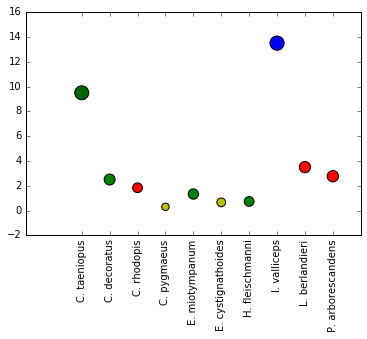

In [74]:
fig, ax = plt.subplots()

# Crea un "diccionario" que permite vincular colores de graficación y el dato de color de la rana
mapa_de_colores = {'Verde oscuro':'darkgreen', 'Café ':'g', 
                    'Café oscuro':'r', 'Café medio':'y', 
                    'Verde claro':'g', 'Gris':'y', 
                    'Verde limón':'g', 'Café claro':'b',
                    'Verde':'r','Dorado':'r'}

ax.scatter(range(len(ranas.Especie.values)), ranas.Longitud_media_mm, 
           c=ranas.Color_dominante.apply(lambda x: mapa_de_colores[x]), s=ranas.Peso_promedio_gr * 4)

plt.xticks(range(len(ranas.Especie.values)), ranas.Especie, rotation=90)

plt.show()

### Conclusión

Sería bueno que comentaras aquí que es lo que se te dificultó y como piensas que alguién más podría enfrentar este desafío de mejor manera.

Espero persistas en seguir aprendiendo **python**, con lo que viste esta semana debes tener una idea de por donde empezar, aunque debes mejorar en tus habilidades para pedir y encontrar ayuda. 

Jupyter es una bonita herramienta como puedes ver en esta muestra de [ejemplos generales](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/). Por último, seguro que encontraras cosas de interés en esta [galería](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-and-IPython-Notebooks) por ejemplo esta introducción al [análisis acústico](https://github.com/calebmadrigal/FourierTalkOSCON) o esta introducción a los [SpectroGramas](https://timsainb.github.io/spectrograms-mfccs-and-inversion-in-python.html)

¿Aprender a programar?, qué tal [este sitio](https://www.codecademy.com/es)

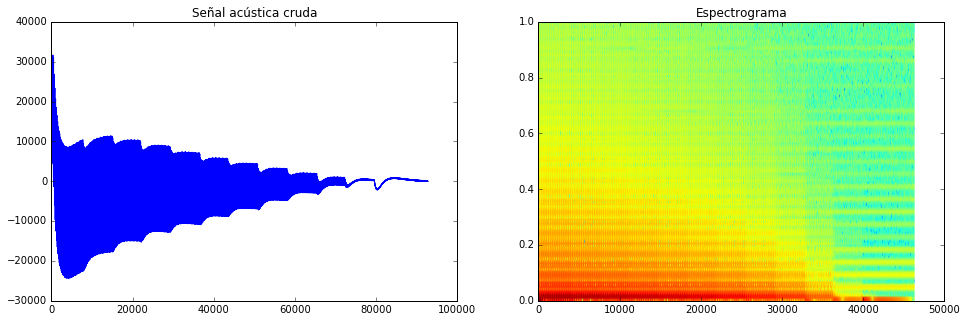

In [26]:
from scipy.io import wavfile
rate, x = wavfile.read("test_mono.wav")
fig, (ax1, ax2) = plt.subplots (1, 2, figsize=(16, 5))
ax1.plot(x); ax1.set_title("Señal acústica cruda");
ax2.specgram(x); ax2.set_title("Espectrograma");